# Übung 13 - kMeans Clustering

In [2]:
# Daten einlesen - wir arbeiten nochmals mit dem Standard-Datensatz Iris von Scikit-Learn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values # dieses Mal werden zwei Features genommen!
scaler = StandardScaler()
X = scaler.fit_transform(X)

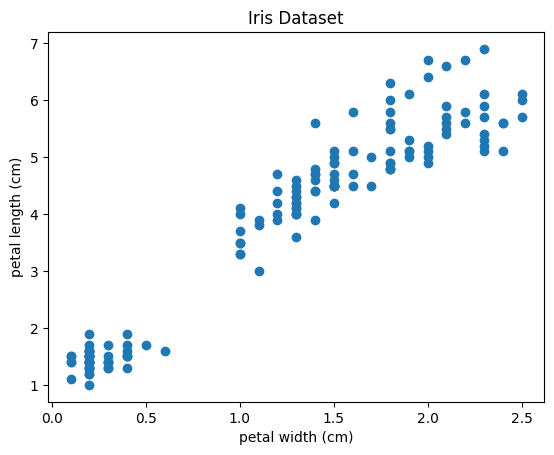

In [3]:
# Daten von petal width (cm) vs petal length (cm) plotten
import matplotlib.pyplot as plt

plt.scatter(iris.data['petal width (cm)'], iris.data['petal length (cm)'])
plt.title('Iris Dataset')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [4]:
# k-Means trainieren
from sklearn.cluster import KMeans

# Anzahl Cluster ist ein Hyperparameter!
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [5]:
# "Vorhersagen" für die Beobachtungen machen
y_pred = kmeans.predict(X)

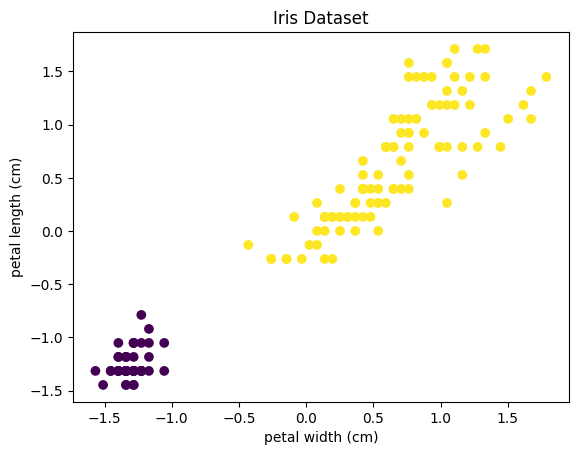

In [6]:
# gemachte Vorhersagen visualisieren
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Iris Dataset')
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

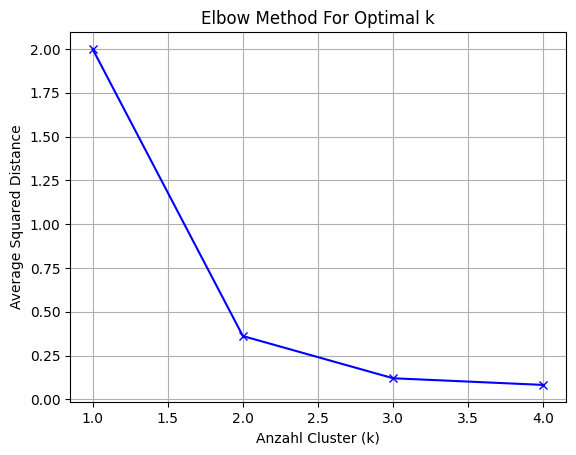

In [8]:
# Ideale Anzahl Cluster identifizieren anhand Elbow-Chart
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

avg_squared_distance = []
K = range(1,5)

for k in K:
  kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
  avg_squared_distance.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

plt.plot(K, avg_squared_distance, 'bx-')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Average Squared Distance')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

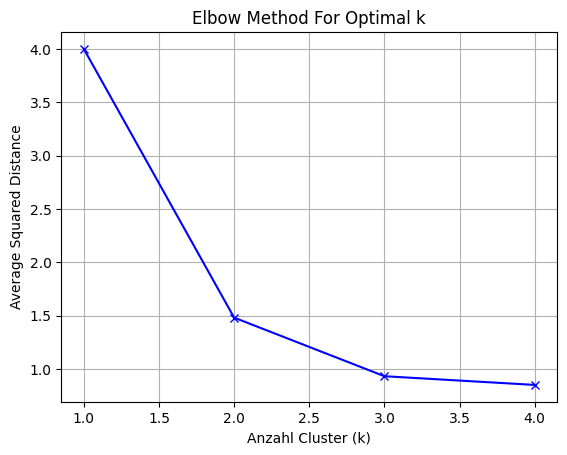

In [12]:
# Wie sieht es aus, wenn wir alle Features verwenden?
X = iris.data.values # dieses Mal werden zwei Features genommen!
scaler = StandardScaler()
X = scaler.fit_transform(X)

avg_squared_distance = []
K = range(1,5)

for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  avg_squared_distance.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

plt.plot(K, avg_squared_distance, 'bx-')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Average Squared Distance')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

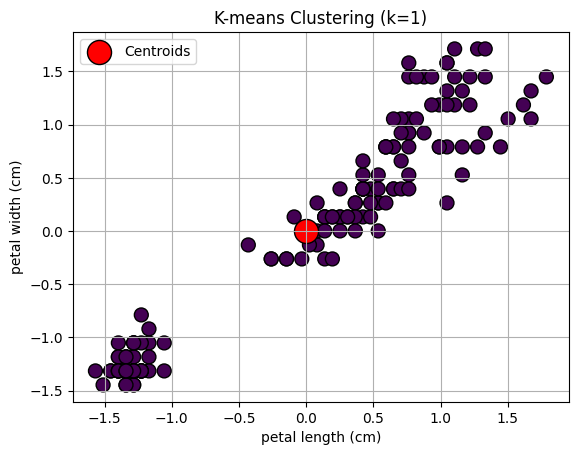

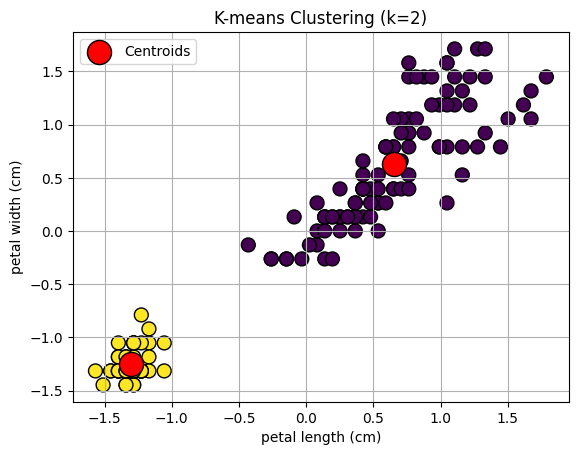

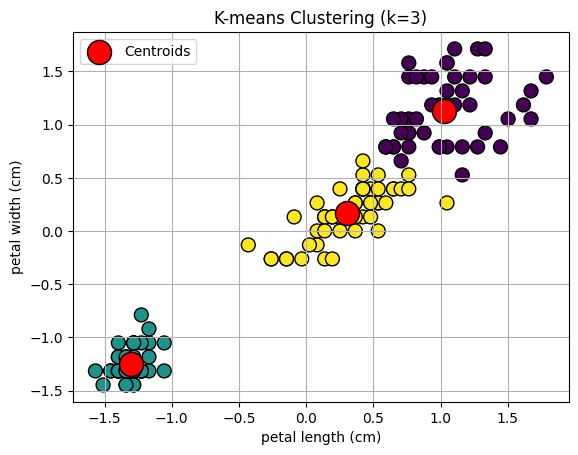

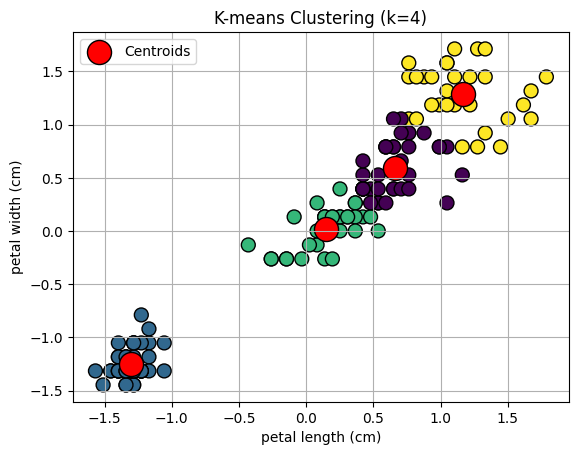

In [16]:
# Wir können auch noch die Cluster mit den Mittelpunkten visualisieren
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # dieses Mal werden zwei Features genommen!
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize a range of k values
k_range = range(1, 5)

# Fit and plot data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Plot the clustered data points
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.legend()
    plt.grid()
    plt.show()